# Задание 1. Загрузка и первичный анализ

- Загрузите данные из CSV в DataFrame.
- Проверьте типы колонок и количество непустых значений (info()).
- Преобразуйте order_start_prepare и order_ready в datetime.
- Подсчитайте число пропусков по каждому столбцу и сделайте первичные выводы.

## Загрузите данные из CSV в DataFrame

In [31]:
import pandas as pd


def load_df_by_name(name: str) -> pd.DataFrame:
    """
    Загрузить набор данных файла по имени.
    """
    return pd.read_csv(f"./data/{name}.csv")


orders = load_df_by_name("orders")
products = load_df_by_name("products")
regions = load_df_by_name("regions")
stores = load_df_by_name("stores")


## Проверьте типы колонок и количество непустых значений (info()).

In [32]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19871 non-null  int64  
 1   store_id             19871 non-null  int64  
 2   order_id             19871 non-null  int64  
 3   product_id           322 non-null    float64
 4   price                17944 non-null  float64
 5   profit               17771 non-null  float64
 6   delivery_distance    19871 non-null  int64  
 7   order_start_prepare  17908 non-null  object 
 8   planned_prep_time    19871 non-null  float64
 9   order_ready          17771 non-null  object 
 10  region_id            19871 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [33]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    71 non-null     int64 
 1   name_product  71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [34]:
regions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   region_id             8 non-null      int64 
 1   delivery_region_name  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [35]:
stores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    62 non-null     int64 
 1   store_name  62 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## Преобразуйте order_start_prepare и order_ready в datetime.

In [36]:
updated_orders = orders.copy()
updated_orders["order_start_prepare"] = pd.to_datetime(
    updated_orders["order_start_prepare"]
)
updated_orders["order_ready"] = pd.to_datetime(updated_orders["order_ready"])

updated_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           19871 non-null  int64         
 1   store_id             19871 non-null  int64         
 2   order_id             19871 non-null  int64         
 3   product_id           322 non-null    float64       
 4   price                17944 non-null  float64       
 5   profit               17771 non-null  float64       
 6   delivery_distance    19871 non-null  int64         
 7   order_start_prepare  17908 non-null  datetime64[ns]
 8   planned_prep_time    19871 non-null  float64       
 9   order_ready          17771 non-null  datetime64[ns]
 10  region_id            19871 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 1.7 MB


## Подсчитайте число пропусков по каждому столбцу и сделайте первичные выводы.

In [37]:
def print_nans(df: pd.DataFrame) -> None:
    """
    Выводит информацию о количестве NaN значений в каждом столбце DataFrame.
    """

    COLUMN_IDX: int = 1
    count = 0
    has_nans = 0

    for column_name in df:
        count += 1
        column = df[column_name]
        column_type = column.dtype
        nans_count = column.isna().sum()
        if nans_count > 0:
            print(
                f'{count}) "{column_name}" содержит {nans_count} пустых значений, тип "{column_type}".'
            )
            has_nans += 1
        else:
            print(
                f'{count}) "{column_name}" не содержит пустых значений, тип "{column_type}".'
            )

    print(f"\nИтого: [{has_nans}/{df.shape[COLUMN_IDX]}] столбцов с NaN значениями.")


In [38]:
print_nans(updated_orders)


1) "Unnamed: 0" не содержит пустых значений, тип "int64".
2) "store_id" не содержит пустых значений, тип "int64".
3) "order_id" не содержит пустых значений, тип "int64".
4) "product_id" содержит 19549 пустых значений, тип "float64".
5) "price" содержит 1927 пустых значений, тип "float64".
6) "profit" содержит 2100 пустых значений, тип "float64".
7) "delivery_distance" не содержит пустых значений, тип "int64".
8) "order_start_prepare" содержит 1963 пустых значений, тип "datetime64[ns]".
9) "planned_prep_time" не содержит пустых значений, тип "float64".
10) "order_ready" содержит 2100 пустых значений, тип "datetime64[ns]".
11) "region_id" не содержит пустых значений, тип "int64".

Итого: [5/11] столбцов с NaN значениями.


# Задание 2. Визуализация

- Постройте гистограмму по product_id с подписями product_name.
- Постройте график плотности для price.
- Анализ «одной переменной»: describe() + гистограммы (для store_id/region_id — подписи store_name/region_name), графики плотности для числовых признаков.

## Постройте гистограмму по product_id с подписями product_name.

In [39]:
import matplotlib.pyplot as plt


def make_histogram(df: pd.DataFrame, ylabel: str, xlabel: str) -> None:
    ylabels = df[ylabel]
    xlabels = df[xlabel]

    plt.figure(figsize=(12, 4))
    plt.bar(ylabels.astype(str), [1] * len(df))

    plt.xticks(
        ticks=range(len(df)),
        labels=xlabels,
        rotation=90,
    )
    plt.xlabel("Название")
    plt.ylabel("Частота")
    plt.title("Гистограмма")

    plt.show()


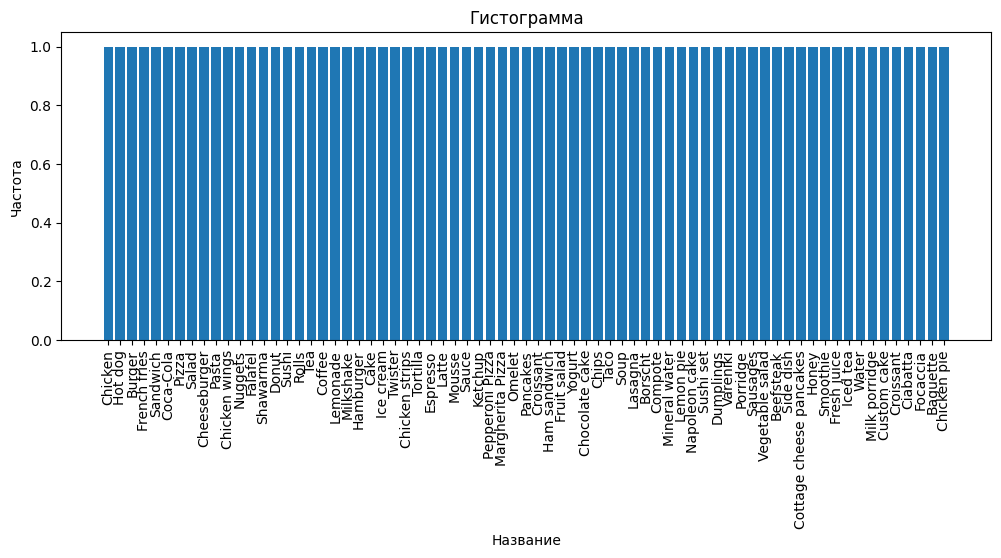

In [40]:
make_histogram(products, "product_id", "name_product")

In [41]:
import seaborn as sns

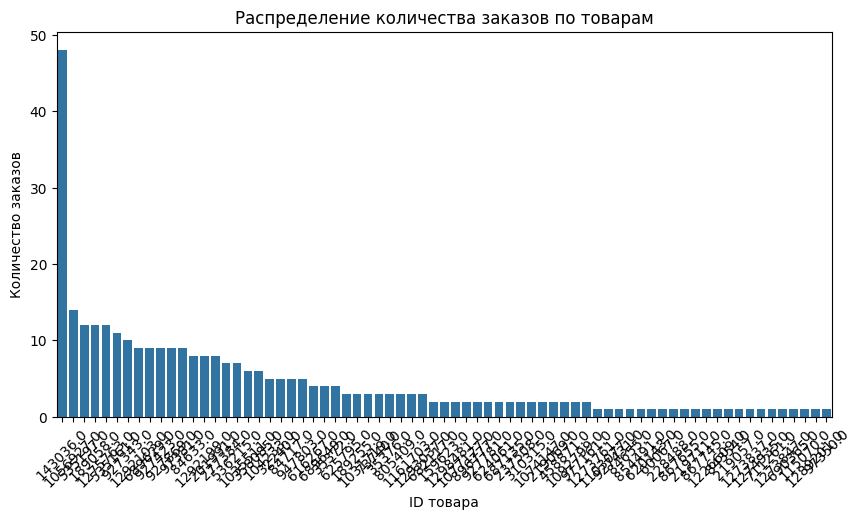

In [42]:
merged = orders.merge(products, on="product_id", how="left")

plt.figure(figsize=(10, 5))
sns.countplot(
    data=merged, x="product_id", order=merged["product_id"].value_counts().index
)
plt.title("Распределение количества заказов по товарам")
plt.xlabel("ID товара")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()


## Постройте график плотности для price.

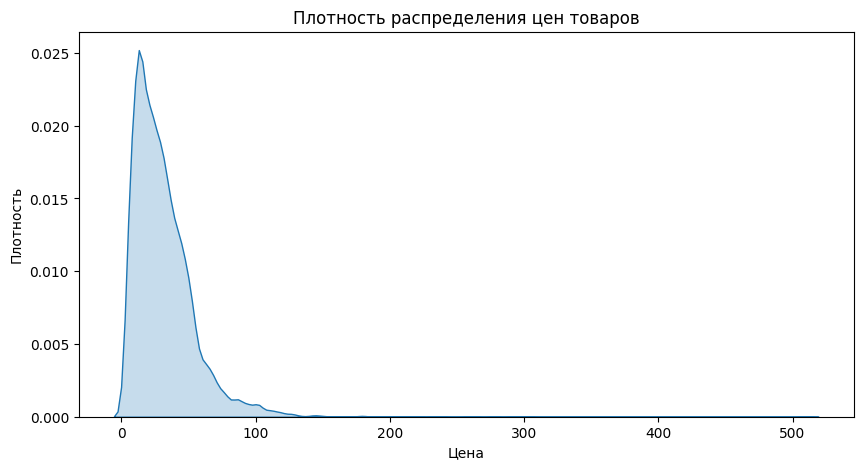

In [43]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=merged, x="price", fill=True)
plt.title("Плотность распределения цен товаров")
plt.xlabel("Цена")
plt.ylabel("Плотность")
plt.show()

## Анализ «одной переменной»: describe() + гистограммы (для store_id/region_id — подписи store_name/region_name), графики плотности для числовых признаков.

In [44]:
store_ids = updated_orders["store_id"]
store_ids.describe()


count    19871.000000
mean      6125.005938
std       2753.504051
min       3053.000000
25%       3686.000000
50%       5014.000000
75%       8717.000000
max      11819.000000
Name: store_id, dtype: float64

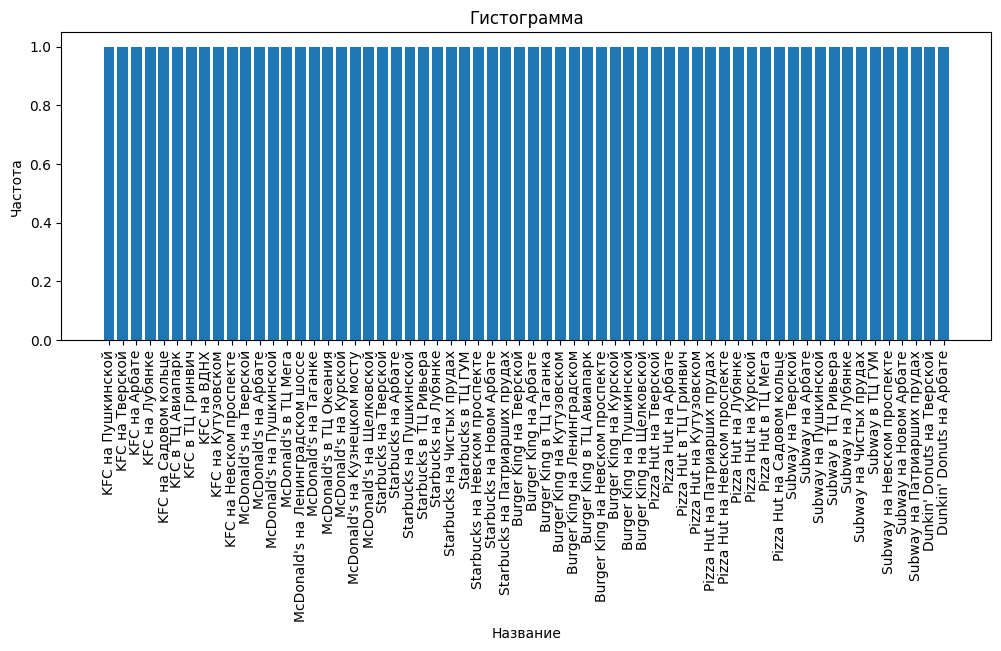

In [45]:
make_histogram(stores, "store_id", "store_name")


<Axes: ylabel='Density'>

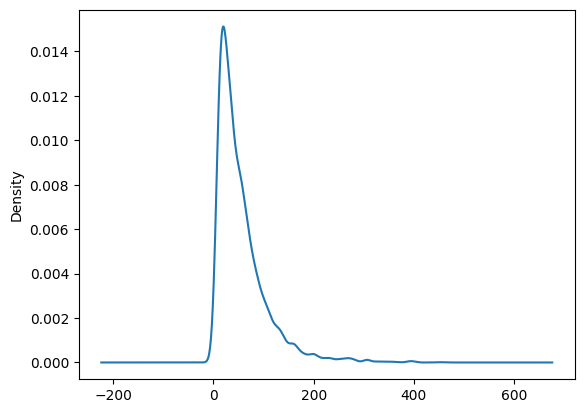

In [46]:
profits = updated_orders["profit"]
profits.plot.density()


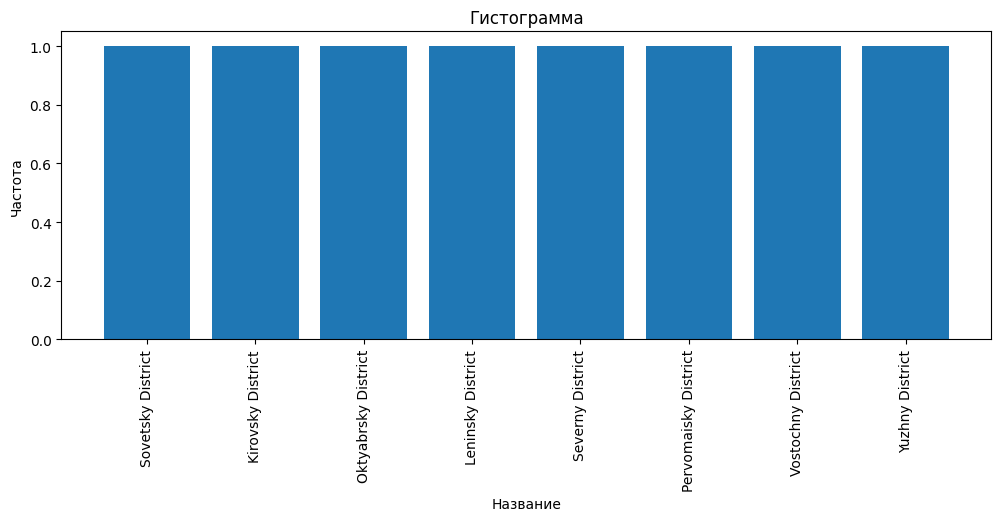

In [47]:
make_histogram(regions, "region_id", "delivery_region_name")


# Задание 3. Анализ аномалий

- Проверьте данные на выбросы и NaN.
- Обоснуйте и примените стратегии обработки пропусков (для разных признаков стратегии могут отличаться).
- Обоснуйте и примените стратегию обработки выбросов.

## Проверьте данные на выбросы и NaN.

In [48]:
updated_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19871 entries, 0 to 19870
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           19871 non-null  int64         
 1   store_id             19871 non-null  int64         
 2   order_id             19871 non-null  int64         
 3   product_id           322 non-null    float64       
 4   price                17944 non-null  float64       
 5   profit               17771 non-null  float64       
 6   delivery_distance    19871 non-null  int64         
 7   order_start_prepare  17908 non-null  datetime64[ns]
 8   planned_prep_time    19871 non-null  float64       
 9   order_ready          17771 non-null  datetime64[ns]
 10  region_id            19871 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5)
memory usage: 1.7 MB


In [49]:
print_nans(updated_orders)


1) "Unnamed: 0" не содержит пустых значений, тип "int64".
2) "store_id" не содержит пустых значений, тип "int64".
3) "order_id" не содержит пустых значений, тип "int64".
4) "product_id" содержит 19549 пустых значений, тип "float64".
5) "price" содержит 1927 пустых значений, тип "float64".
6) "profit" содержит 2100 пустых значений, тип "float64".
7) "delivery_distance" не содержит пустых значений, тип "int64".
8) "order_start_prepare" содержит 1963 пустых значений, тип "datetime64[ns]".
9) "planned_prep_time" не содержит пустых значений, тип "float64".
10) "order_ready" содержит 2100 пустых значений, тип "datetime64[ns]".
11) "region_id" не содержит пустых значений, тип "int64".

Итого: [5/11] столбцов с NaN значениями.


In [50]:
print_nans(products)


1) "product_id" не содержит пустых значений, тип "int64".
2) "name_product" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


In [51]:
print_nans(regions)


1) "region_id" не содержит пустых значений, тип "int64".
2) "delivery_region_name" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


In [52]:
print_nans(stores)


1) "store_id" не содержит пустых значений, тип "int64".
2) "store_name" не содержит пустых значений, тип "object".

Итого: [0/2] столбцов с NaN значениями.


## Обоснуйте и примените стратегии обработки пропусков (для разных признаков стратегии могут отличаться).

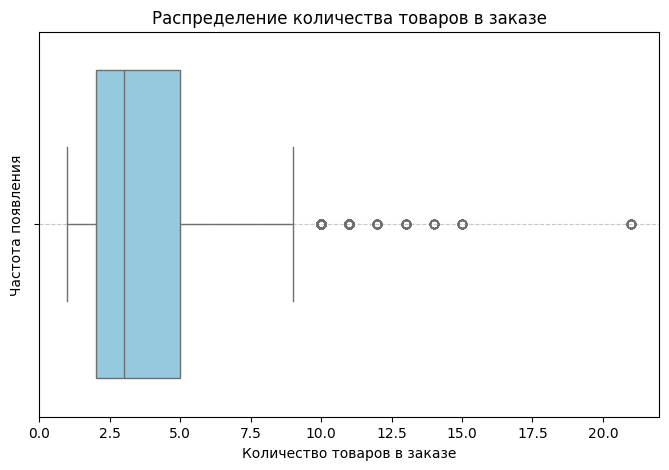

In [53]:
# создаём копию и заменяем пропущенные product_id
fixed_orders = orders.copy()
fixed_orders["product_id"] = fixed_orders["product_id"].fillna(
    "unknown_" + fixed_orders["price"].astype(str)
)

# добавляем количество товаров в заказе
items_per_order = (
    fixed_orders.groupby("order_id")["product_id"]
    .count()
    .reset_index(name="items_count")
)
fixed_orders = fixed_orders.merge(items_per_order, on="order_id", how="left")

# фильтрация выбросов по цене
Q1 = fixed_orders["price"].quantile(0.25)
Q3 = fixed_orders["price"].quantile(0.75)
IQR = Q3 - Q1
filtered_orders = fixed_orders[
    (fixed_orders["price"] >= Q1 - 1.5 * IQR)
    & (fixed_orders["price"] <= Q3 + 1.5 * IQR)
]

# визуализация выбросов по количеству товаров
plt.figure(figsize=(8, 5))
sns.boxplot(x=fixed_orders["items_count"], color="skyblue")
plt.title("Распределение количества товаров в заказе", fontsize=12)
plt.xlabel("Количество товаров в заказе")
plt.ylabel("Частота появления")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()


## Обоснуйте и примените стратегию обработки выбросов.

<Axes: ylabel='Density'>

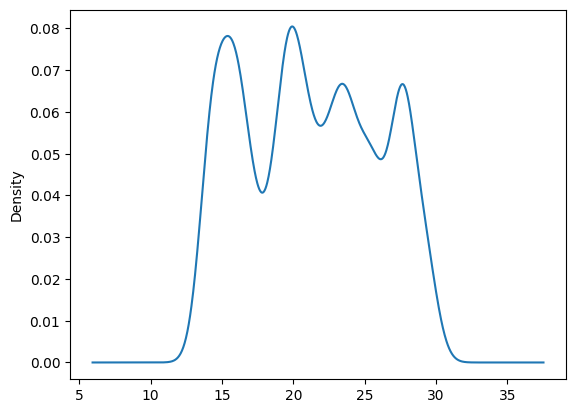

In [54]:
# Смотрим выброс с помощью квантилей
profits = updated_orders["price"]

q_low = profits.quantile(0.35)
q_hi = profits.quantile(0.45)
q_range = q_hi - q_low
quantiles_orders = updated_orders[
    (profits < q_hi + 1.5 * q_range) & (profits > q_low - 1.5 * q_range)
]
quantiles_orders["price"].plot.density()

<Axes: ylabel='Density'>

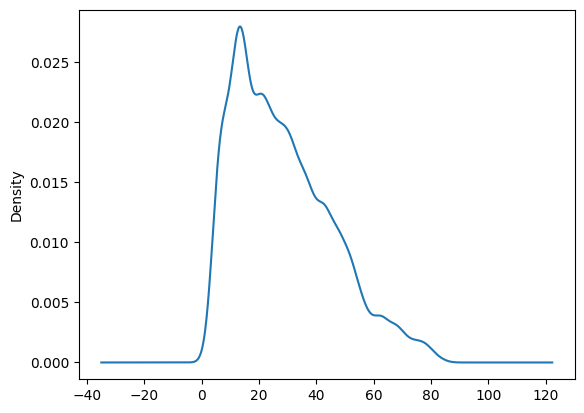

In [55]:
q1 = updated_orders["price"].quantile(0.25)
q3 = updated_orders["price"].quantile(0.75)
iqr = q3 - q1

filtered_orders = updated_orders[
    (updated_orders["price"] >= q1 - 1.5 * iqr)
    & (updated_orders["price"] <= q3 + 1.5 * iqr)
]
filtered_orders["price"].plot.density()


In [56]:
print(f"Удалено выбросов: {len(updated_orders) - len(filtered_orders)}")


Удалено выбросов: 2523


# Задание 4. Обогащение

- Создайте order_price — сумму стоимости товаров в заказе.
- Создайте items_count — количество товаров в заказе.
- Удалите временные поля (product_id, price) и сведите данные к уровню «одна строка = один заказ».

## Создайте order_price — сумму стоимости товаров в заказе.

In [ ]:
order_prices = filtered_orders.dropna().copy()

items_per_order = (
    order_prices.groupby("order_id")["product_id"]
    .count()
    .reset_index(name="items_count")
)
order_prices = order_prices.merge(items_per_order, on="order_id", how="left")
order_prices["order_price"] = order_prices["price"] * order_prices["items_count"]

order_prices.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price
0,23,3522,20562409,84633.0,29.230,62.5680,9387,2024-09-05 15:00:31,25.0,2024-09-05 15:09:17,685,1,29.230
1,108,5014,20562059,682117.0,73.470,80.2640,3699,2024-09-05 14:29:29,15.0,2024-09-05 14:41:35,683,1,73.470
2,129,8283,20561995,625795.0,43.845,56.2875,3623,2024-09-05 14:24:54,35.0,2024-09-05 14:34:21,683,1,43.845
3,398,3766,20561175,201991.0,52.140,26.0700,3789,2024-09-05 13:33:42,20.0,2024-09-05 13:39:38,683,1,52.140
4,838,3766,20559603,201991.0,52.140,10.4280,5232,2024-09-05 12:16:54,20.0,2024-09-05 12:27:32,683,1,52.140


## Создайте `items_count` — количество товаров в заказе.

In [65]:
items_counts = updated_orders.groupby("order_id", as_index=False)["product_id"].count()
items_counts = items_counts.rename(columns={"product_id": "items_count"})
items_counts.head()


,order_id,items_count
0,20494109,0
1,20494115,0
2,20494123,1
3,20494143,0
4,20494147,0


## Удалите временные поля (`product_id`, `price`) и сведите данные к уровню «одна строка = один заказ».

In [68]:
enriched_orders = (
    order_prices.drop(columns=["product_id", "price"])
    .drop_duplicates(subset=["order_id"])
    .merge(order_prices, on="order_id")
    .merge(items_counts, on="order_id")
)

enriched_orders.info()
enriched_orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0_x           185 non-null    int64         
 1   store_id_x             185 non-null    int64         
 2   order_id               185 non-null    int64         
 3   profit_x               185 non-null    float64       
 4   delivery_distance_x    185 non-null    int64         
 5   order_start_prepare_x  185 non-null    datetime64[ns]
 6   planned_prep_time_x    185 non-null    float64       
 7   order_ready_x          185 non-null    datetime64[ns]
 8   region_id_x            185 non-null    int64         
 9   items_count_x          185 non-null    int64         
 10  order_price_x          185 non-null    float64       
 11  Unnamed: 0_y           185 non-null    int64         
 12  store_id_y             185 non-null    int64         
 13  produ

,Unnamed: 0_x,store_id_x,order_id,profit_x,delivery_distance_x,order_start_prepare_x,planned_prep_time_x,order_ready_x,region_id_x,items_count_x,...,price,profit_y,delivery_distance_y,order_start_prepare_y,planned_prep_time_y,order_ready_y,region_id_y,items_count_y,order_price_y,items_count
0,23,3522,20562409,62.5680,9387,2024-09-05 15:00:31,25.0,2024-09-05 15:09:17,685,1,...,29.230,62.5680,9387,2024-09-05 15:00:31,25.0,2024-09-05 15:09:17,685,1,29.230,1
1,108,5014,20562059,80.2640,3699,2024-09-05 14:29:29,15.0,2024-09-05 14:41:35,683,1,...,73.470,80.2640,3699,2024-09-05 14:29:29,15.0,2024-09-05 14:41:35,683,1,73.470,1
2,129,8283,20561995,56.2875,3623,2024-09-05 14:24:54,35.0,2024-09-05 14:34:21,683,1,...,43.845,56.2875,3623,2024-09-05 14:24:54,35.0,2024-09-05 14:34:21,683,1,43.845,1
3,398,3766,20561175,26.0700,3789,2024-09-05 13:33:42,20.0,2024-09-05 13:39:38,683,1,...,52.140,26.0700,3789,2024-09-05 13:33:42,20.0,2024-09-05 13:39:38,683,1,52.140,1
4,838,3766,20559603,10.4280,5232,2024-09-05 12:16:54,20.0,2024-09-05 12:27:32,683,1,...,52.140,10.4280,5232,2024-09-05 12:16:54,20.0,2024-09-05 12:27:32,683,1,52.140,1


# Задание 5. Формирование целевой переменной и корреляционный анализ

- Рассчитайте actual_time = order_ready - order_start_prepare.
- Создайте prepared_on_time: 1 — если actual_time ≤ planned_prep_time + 5 минут, иначе 0; удалите вспомогательный actual_time.
- Посчитайте корреляцию числовых признаков (profit, delivery_distance, planned_prep_time, items_count, order_price и др.) с prepared_on_time и визуализируйте heatmap.

## Рассчитайте `actual_time = order_ready - order_start_prepare`.

In [ ]:
# используем агрегированные данные
df = order_prices.copy()

# конвертируем даты и время
df["order_start_prepare"] = pd.to_datetime(df["order_start_prepare"])
df["order_ready"] = pd.to_datetime(df["order_ready"])

# planned_prep_time может быть строкой или числом — приводим к timedelta
df["planned_prep_time"] = pd.to_timedelta(df["planned_prep_time"], unit="m")

# вычисляем фактическое время подготовки
df["actual_prep_time"] = df["order_ready"] - df["order_start_prepare"]

# бинарный признак: 1 — вовремя, 0 — с опозданием
df["prepared_on_time"] = (df["actual_prep_time"] <= df["planned_prep_time"]).astype(int)

df.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,actual_prep_time,prepared_on_time
0,23,3522,20562409,84633.0,29.230,62.5680,9387,2024-09-05 15:00:31,0 days 00:25:00,2024-09-05 15:09:17,685,1,29.230,0 days 00:08:46,1
1,108,5014,20562059,682117.0,73.470,80.2640,3699,2024-09-05 14:29:29,0 days 00:15:00,2024-09-05 14:41:35,683,1,73.470,0 days 00:12:06,1
2,129,8283,20561995,625795.0,43.845,56.2875,3623,2024-09-05 14:24:54,0 days 00:35:00,2024-09-05 14:34:21,683,1,43.845,0 days 00:09:27,1
3,398,3766,20561175,201991.0,52.140,26.0700,3789,2024-09-05 13:33:42,0 days 00:20:00,2024-09-05 13:39:38,683,1,52.140,0 days 00:05:56,1
4,838,3766,20559603,201991.0,52.140,10.4280,5232,2024-09-05 12:16:54,0 days 00:20:00,2024-09-05 12:27:32,683,1,52.140,0 days 00:10:38,1


## Создайте prepared_on_time: 1 — если actual_time ≤ planned_prep_time + 5 минут, иначе 0; удалите вспомогательный actual_time.

In [72]:
from datetime import timedelta

# создаём признак с допуском +5 минут
df["prepared_on_time"] = (
    df["actual_prep_time"] <= df["planned_prep_time"] + timedelta(minutes=5)
).astype(int)

# удаляем вспомогательный столбец
df = df.drop(columns=["actual_prep_time"])

df.head()


,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,prepared_on_time
0,23,3522,20562409,84633.0,29.230,62.5680,9387,2024-09-05 15:00:31,0 days 00:25:00,2024-09-05 15:09:17,685,1,29.230,1
1,108,5014,20562059,682117.0,73.470,80.2640,3699,2024-09-05 14:29:29,0 days 00:15:00,2024-09-05 14:41:35,683,1,73.470,1
2,129,8283,20561995,625795.0,43.845,56.2875,3623,2024-09-05 14:24:54,0 days 00:35:00,2024-09-05 14:34:21,683,1,43.845,1
3,398,3766,20561175,201991.0,52.140,26.0700,3789,2024-09-05 13:33:42,0 days 00:20:00,2024-09-05 13:39:38,683,1,52.140,1
4,838,3766,20559603,201991.0,52.140,10.4280,5232,2024-09-05 12:16:54,0 days 00:20:00,2024-09-05 12:27:32,683,1,52.140,1


## Посчитайте корреляцию числовых признаков (`profit`, `delivery_distance`, `planned_prep_time`, `items_count`, `order_price` и др.) с `prepared_on_time` и визуализируйте heatmap.

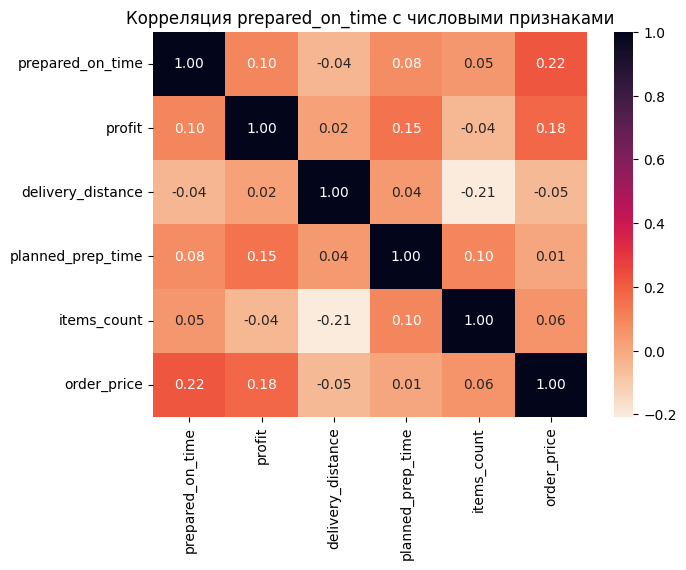

In [ ]:
# только числовые признаки
corr_columns = [
    "prepared_on_time",
    "profit",
    "delivery_distance",
    "planned_prep_time",
    "items_count",
    "order_price",
]

corr = df[corr_columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="rocket_r", fmt=".2f")
plt.title("Корреляция prepared_on_time с числовыми признаками")
plt.show()
